https://towardsdatascience.com/how-to-run-code-on-a-real-quantum-computer-c1fc61ff5b4

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, IBMQ, execute, transpile, Aer, assemble
from qiskit.tools.monitor import job_monitor

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

qr = QuantumRegister(5)
cr = ClassicalRegister(5)

circuit = QuantumCircuit(qr, cr)
circuit.x(qr[0])
circuit.x(qr[1])
circuit.ccx(qr[0], qr[1], qr[2])
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)

In [18]:
import os
from dotenv import load_dotenv; load_dotenv()

# replace TOKEN with your API token string (https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq)
IBMQ.save_account(os.environ["TOKEN"], overwrite=True) 
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-05-27 19:24:06,203: Credentials are already in use. The existing account in the session will be replaced.


In [3]:
# Get backend for experiment
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_quito')

# prepare the circuit for the backend
mapped_circuit = transpile(circuit, backend=backend)
qobj = assemble(mapped_circuit, backend=backend, shots=1024)

# execute the circuit
job = backend.run(qobj)

In [4]:
job.status()

<JobStatus.QUEUED: 'job is queued'>

https://quantum-computing.ibm.com/jobs?backend=ibmq_quito

wait time: 2 часа

Queue position: 7

exec time: 3 s

In [21]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [8]:
job.job_id()

'chougjf8rmtc64quk2ag'

In [20]:
job_id = 'chougjf8rmtc64quk2ag'
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
job = provider.get_backend('ibmq_quito').retrieve_job('61b32368e4d3eb10e15c8b0e')


IBMQBackendApiError: "Failed to get job 61b32368e4d3eb10e15c8b0e: '403 Client Error: Forbidden for url: https://api.quantum-computing.ibm.com/api/Network/ibm-q/Groups/open/Projects/main/Jobs/61b32368e4d3eb10e15c8b0e/v/1. Forbidden., Error code: 2409.'"

In [22]:
result = job.result()
counts = result.get_counts()
print(counts)

{'00000': 7, '00001': 85, '10001': 1, '10010': 1, '10100': 2, '10101': 11, '10111': 1, '00010': 25, '00011': 21, '00100': 66, '00101': 735, '00110': 17, '00111': 38, '01011': 2, '01101': 12}


In [23]:
from qiskit.visualization import plot_histogram

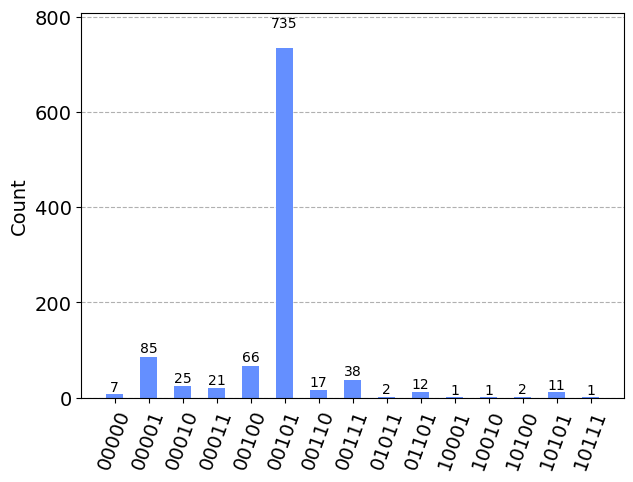

In [25]:
plot_histogram(counts)

## Test in simulation

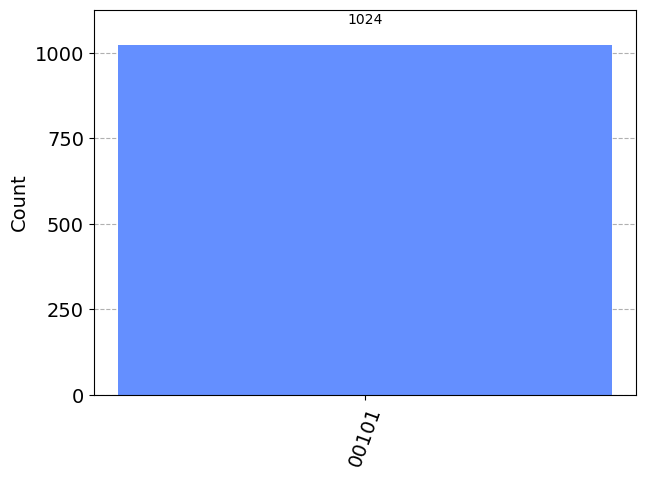

In [11]:
simulator = Aer.get_backend('qasm_simulator')

results = execute(circuit,simulator).result().get_counts()

plot_histogram(results)

In [2]:
circuit.draw()

┌───┐          ┌─┐   
q0_0: ┤ X ├──■────■──┤M├───
      ├───┤  │  ┌─┴─┐└╥┘┌─┐
q0_1: ┤ X ├──■──┤ X ├─╫─┤M├
      └───┘┌─┴─┐└┬─┬┘ ║ └╥┘
q0_2: ─────┤ X ├─┤M├──╫──╫─
       ┌─┐ └───┘ └╥┘  ║  ║ 
q0_3: ─┤M├────────╫───╫──╫─
       └╥┘  ┌─┐   ║   ║  ║ 
q0_4: ──╫───┤M├───╫───╫──╫─
        ║   └╥┘   ║   ║  ║ 
c0: 5/══╩════╩════╩═══╩══╩═
        3    4    2   0  1

(сконвертировалось в 18 слоев на реальном компьютере....)

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(5, 'q')
creg_c0 = ClassicalRegister(5, 'c0')
circuit = QuantumCircuit(qreg_q, creg_c0)

circuit.rz(1.5707963267948966, qreg_q[1])
circuit.sx(qreg_q[1])
circuit.rz(1.5707963267948966, qreg_q[1])
circuit.x(qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[1])
circuit.rz(-0.7853981633974483, qreg_q[1])
circuit.x(qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[1])
circuit.rz(0.7853981633974483, qreg_q[1])
circuit.cx(qreg_q[2], qreg_q[1])
circuit.rz(-0.7853981633974483, qreg_q[1])
circuit.rz(0.7853981633974483, qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[1])
circuit.rz(2.356194490192345, qreg_q[1])
circuit.sx(qreg_q[1])
circuit.rz(1.5707963267948966, qreg_q[1])
circuit.cx(qreg_q[2], qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[1])
circuit.rz(-0.7853981633974483, qreg_q[1])
circuit.rz(0.7853981633974483, qreg_q[3])
circuit.barrier(qreg_q[3], qreg_q[1], qreg_q[2], qreg_q[0], qreg_q[4])
circuit.measure(qreg_q[3], creg_c0[0])
circuit.measure(qreg_q[1], creg_c0[1])
circuit.measure(qreg_q[2], creg_c0[2])
circuit.measure(qreg_q[0], creg_c0[3])
circuit.measure(qreg_q[4], creg_c0[4])

circuit.draw()

»
 q_0: ──────────────────────────────────────────────────────────────────»
      ┌─────────┐┌────┐┌─────────┐┌───┐┌──────────┐┌───┐┌─────────┐┌───┐»
 q_1: ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├┤ X ├»
      └──┬───┬──┘└────┘└─────────┘└─┬─┘└──────────┘└─┬─┘└─────────┘└─┬─┘»
 q_2: ───┤ X ├──────────────────────■────────────────┼───────────────■──»
         ├───┤                                       │                  »
 q_3: ───┤ X ├───────────────────────────────────────■──────────────────»
         └───┘                                                          »
 q_4: ──────────────────────────────────────────────────────────────────»
                                                                        »
c0: 5/══════════════════════════════════════════════════════════════════»
                                                                        »
«                                                                        »
« q_0: ──────────────────────────────────────────────────────────────────»
«      ┌──────────┐┌───┐┌──────────┐┌────┐┌─────────┐┌───┐     ┌───┐┌───┐»
« q_1: ┤ Rz(-π/4) ├┤ X ├┤ Rz(3π/4) ├┤ √X ├┤ Rz(π/2) ├┤ X ├──■──┤ X ├┤ X ├»
«      ├─────────┬┘└─┬─┘└──────────┘└────┘└─────────┘└─┬─┘┌─┴─┐└─┬─┘└─┬─┘»
« q_2: ┤ Rz(π/4) ├───┼─────────────────────────────────■──┤ X ├──■────┼──»
«      └─────────┘   │                                    └───┘       │  »
« q_3: ──────────────■────────────────────────────────────────────────■──»
«                                                                        »
« q_4: ──────────────────────────────────────────────────────────────────»
«                                                                        »
«c0: 5/══════════════════════════════════════════════════════════════════»
«                                                                        »
«                   ░          ┌─┐   
« q_0: ─────────────░──────────┤M├───
«      ┌──────────┐ ░    ┌─┐   └╥┘   
« q_1: ┤ Rz(-π/4) ├─░────┤M├────╫────
«      └──────────┘ ░    └╥┘┌─┐ ║    
« q_2: ─────────────░─────╫─┤M├─╫────
«      ┌─────────┐  ░ ┌─┐ ║ └╥┘ ║    
« q_3: ┤ Rz(π/4) ├──░─┤M├─╫──╫──╫────
«      └─────────┘  ░ └╥┘ ║  ║  ║ ┌─┐
« q_4: ─────────────░──╫──╫──╫──╫─┤M├
«                   ░  ║  ║  ║  ║ └╥┘
«c0: 5/════════════════╩══╩══╩══╩══╩═
«                      0  1  2  3  4

погрешность кубитов около 3 %

In [12]:
import qiskit

# qiskit.circuit.library.RZXGate.decompose
qreg_q = QuantumRegister(5, 'q')
creg_c0 = ClassicalRegister(5, 'c0')
circuit = QuantumCircuit(qreg_q, creg_c0)

circuit.rzx(0.3, qreg_q[0], qreg_q[1])

circuit.decompose().draw(), circuit.draw(), 

(                                     
  q_0: ───────■───────────────■───────
       ┌───┐┌─┴─┐┌─────────┐┌─┴─┐┌───┐
  q_1: ┤ H ├┤ X ├┤ Rz(0.3) ├┤ X ├┤ H ├
       └───┘└───┘└─────────┘└───┘└───┘
  q_2: ───────────────────────────────
                                      
  q_3: ───────────────────────────────
                                      
  q_4: ───────────────────────────────
                                      
 c0: 5/═══════════════════════════════
                                      ,
       ┌───────────┐
  q_0: ┤0          ├
       │  Rzx(0.3) │
  q_1: ┤1          ├
       └───────────┘
  q_2: ─────────────
                    
  q_3: ─────────────
                    
  q_4: ─────────────
                    
 c0: 5/═════════════
                    )